In [46]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import pylab
from scipy.stats import probplot,skew

In [47]:
df=pd.read_csv('../Dataset/combined_data.csv')
df

,gender,age,under_30,senior_citizen,number_of_dependents,married,city,zip_code,total_population,phone_service,...,phone_service.1,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,customer_status,churn_reason,churn_value
0,Female,37,No,No,0,Yes,Frazier Park,93225,4498,Yes,...,Yes,No,16,Yes,No,Yes,2,Stayed,Don't know,0
1,Male,46,No,No,0,No,Glendale,91206,31297,Yes,...,Yes,Yes,10,No,No,No,0,Stayed,Don't know,0
2,Male,50,No,No,0,No,Costa Mesa,92627,62069,Yes,...,Yes,No,30,Yes,Offer E,No,0,Churned,Competitor had better devices,1
3,Male,78,No,Yes,0,Yes,Martinez,94553,46677,Yes,...,Yes,No,4,Yes,Offer D,Yes,1,Churned,Product dissatisfaction,1
4,Female,75,No,Yes,0,Yes,Camarillo,93010,42853,Yes,...,Yes,No,11,Yes,No,Yes,3,Churned,Network reliability,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,Yes,No,0,No,La Mesa,91941,44652,Yes,...,Yes,No,59,Yes,Offer D,No,0,Stayed,Don't know,0
7039,Male,40,No,No,0,Yes,Riverbank,95367,16525,Yes,...,Yes,Yes,17,Yes,Offer D,Yes,1,Churned,Product dissatisfaction,1
7040,Male,22,Yes,No,0,No,Elk,95432,383,Yes,...,Yes,No,51,Yes,Offer E,No,0,Joined,Don't know,0
7041,Male,21,Yes,No,0,Yes,Solana Beach,92075,12173,Yes,...,Yes,No,58,Yes,Offer A,Yes,5,Stayed,Don't know,0


# PERCENTAGE OF VARIOUS CATEGORIES OF CUSTOMER_STATUS

In [ ]:
cnt1=0
cnt2=0
cnt3=0
for i in df['customer_status']:
    if i=='Stayed':
        cnt1+=1
    elif i=='Churned':
        cnt2+=1
    else:
        cnt3+=1
print("Percentage of Churned:",cnt2*100/(cnt1+cnt2+cnt3))
print("Percentage of Stayed:",cnt1*100/(cnt1+cnt2+cnt3))
print("Percentage of Joined:",cnt3*100/(cnt1+cnt2+cnt3))

# CATEGORICAL AND NUMERICAL FEATURES

In [48]:
categorical=[i for i in df.columns if df[i].dtype=='object']
numeric=[i for i in df.columns if df[i].dtype!='object']
print(f"CATEGORICAL:{categorical} \nNo of features:{len(categorical)} \n")
print(f"NUMERICAL:{numeric} \nNo of features:{len(numeric)}\n")
print("Total number of features:",len(categorical)+len(numeric))

CATEGORICAL:['gender', 'under_30', 'senior_citizen', 'married', 'city', 'phone_service', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type', 'contract', 'paperless_billing', 'payment_method', 'internet_service.1', 'phone_service.1', 'multiple_lines', 'unlimited_data', 'offer', 'referred_a_friend', 'customer_status', 'churn_reason'] 
No of features:26 

NUMERICAL:['age', 'number_of_dependents', 'zip_code', 'total_population', 'monthly_ charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'tenure', 'avg_monthly_gb_download', 'number_of_referrals', 'churn_value'] 
No of features:15

Total number of features: 41


# DISTRIBUTION AND SKEWNESS ANALYSIS 

Here Age,total_population, monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds, total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download are continous



Feature: age
Unique values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Skewness:0.1621519045783431


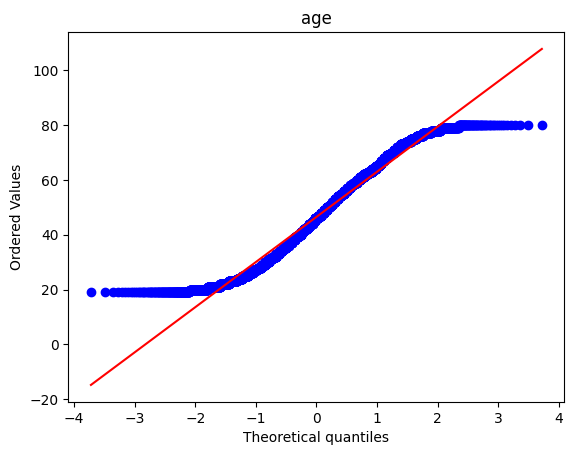



Feature: number_of_dependents
Unique values: [0 3 1 2 4 6 5 9 7 8]
Skewness:2.109482586305897


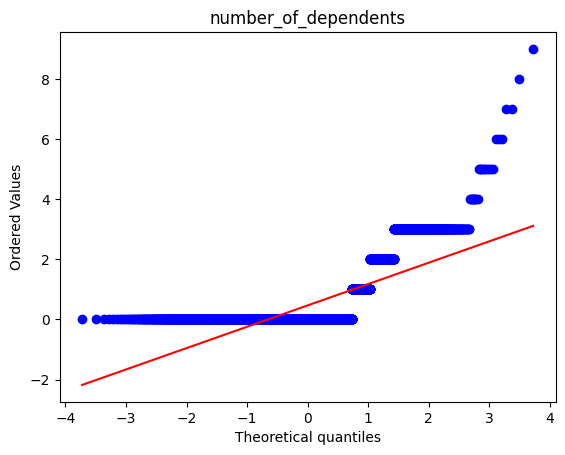



Feature: zip_code
Unique values: [93225 91206 92627 ... 91934 93013 95956]
Skewness:-0.20957037932161476


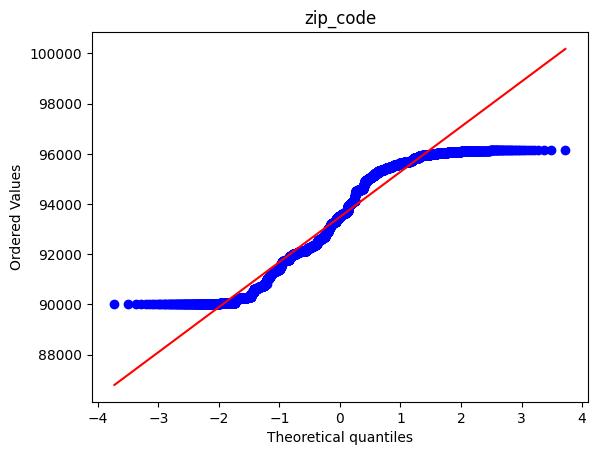



Feature: total_population
Unique values: [ 4498 31297 62069 ... 13027 33038 17409]
Skewness:0.9126899283412824


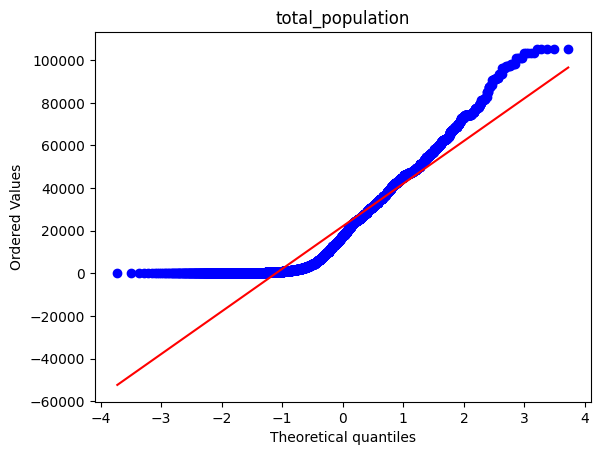



Feature: monthly_ charges
Unique values: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Skewness:-0.2204774644391769


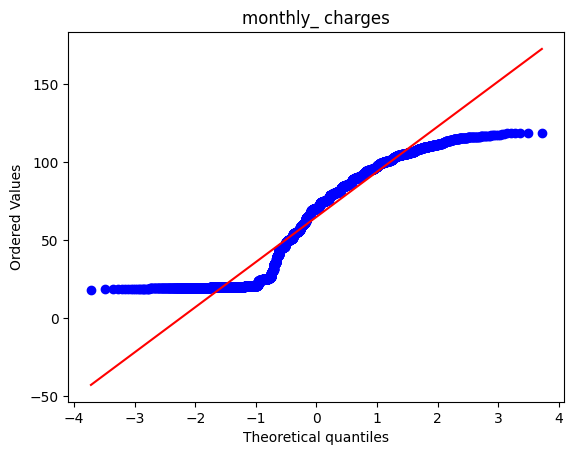



Feature: avg_monthly_long_distance_charges
Unique values: [42.39 10.69 33.65 ... 10.04 25.59  2.01]
Skewness:0.04916542536235986


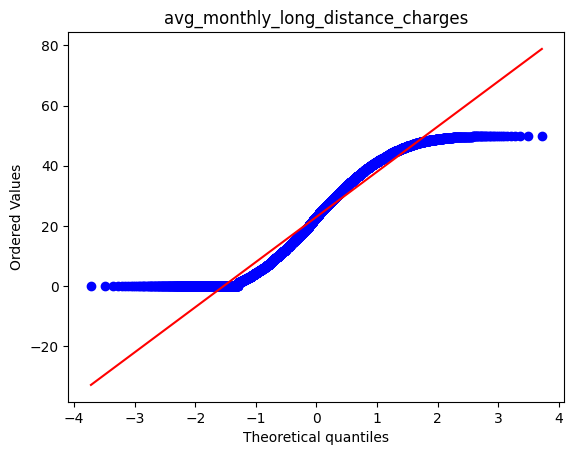



Feature: total_charges
Unique values: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Skewness:0.9635858081692212


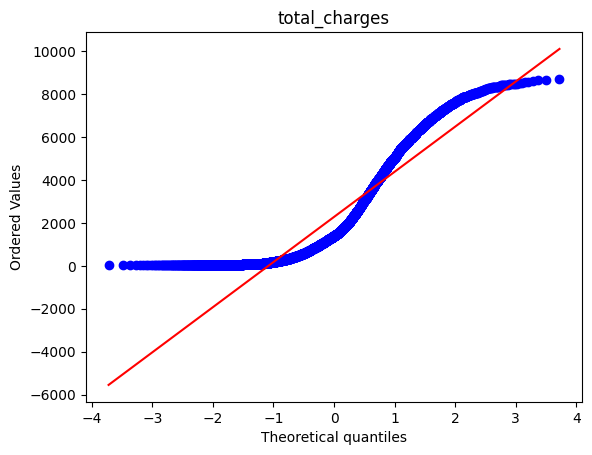



Feature: total_refunds
Unique values: [ 0.   38.33 21.25 30.53 44.42 44.9  12.26  6.11 10.23 13.03 36.02 17.91
  1.01 16.99 25.24 27.01  9.73 44.53 38.46 16.56  4.73 18.88  8.13  8.74
 11.37  1.31 33.8  49.76 16.97 14.21 16.73 49.02  2.28  9.35 41.74 13.01
 27.38 23.97 14.23 18.55  1.48  5.15 33.25 41.33 33.43 22.96 11.45 17.17
 24.99 26.37 38.42 11.72 29.21 45.75 47.79 29.   15.76 17.6  15.17 14.57
 26.32 25.62 20.45 37.06 43.66 28.7  22.34 49.79 46.66  6.26 38.37 49.24
  3.55  7.3  16.96  3.85 34.83 23.39 23.72 33.13 43.76 26.02 40.62 48.54
 10.76 35.34 14.15 12.81 24.07 45.61 16.89  4.18 33.67 17.96 26.99 20.17
 21.81 47.04 12.55 32.65 34.44 36.61 45.44  6.79 48.25 41.66 18.62 20.29
 11.05 15.41 49.37 45.07 36.29 33.24 29.17 29.64  6.65  4.7  33.1  31.05
 42.57 45.38 25.79 11.8  34.67 36.04 39.68 16.38 36.92 24.08  5.83 45.81
 49.06 12.66 41.23 30.14 46.06  3.34 19.31 44.13 35.28 44.17 37.45  3.33
 31.58  2.62 36.66 38.84 17.14 12.48 38.65 11.83 22.55 16.27  8.88 18.85
 46.99 44.6

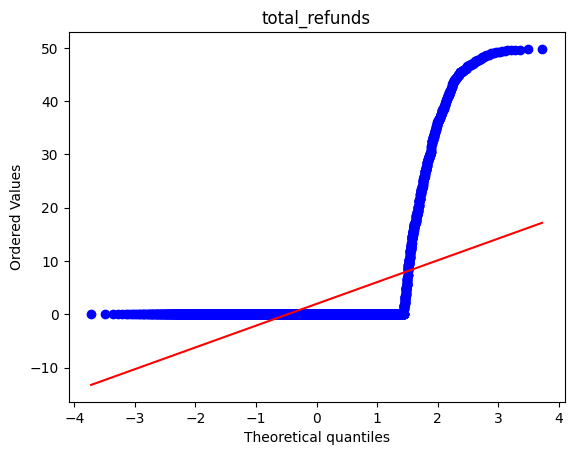



Feature: total_extra_data_charges
Unique values: [  0  10  20  40 120 100 130 110  60 140  50  80 150  70  30  90]
Skewness:4.090337851804683


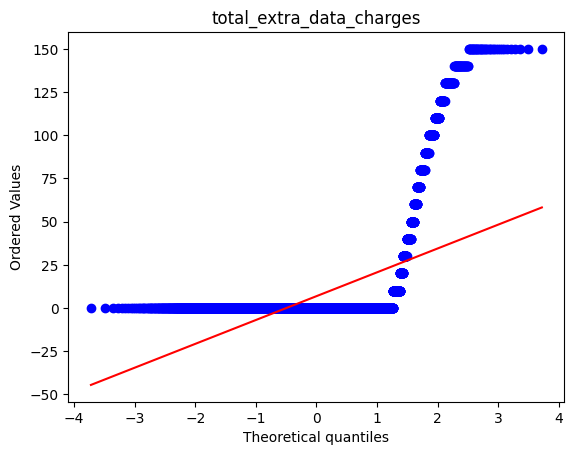



Feature: total_long_distance_charges
Unique values: [381.51  96.21 134.6  ... 356.4   37.24 142.04]
Skewness:1.2380182422433934


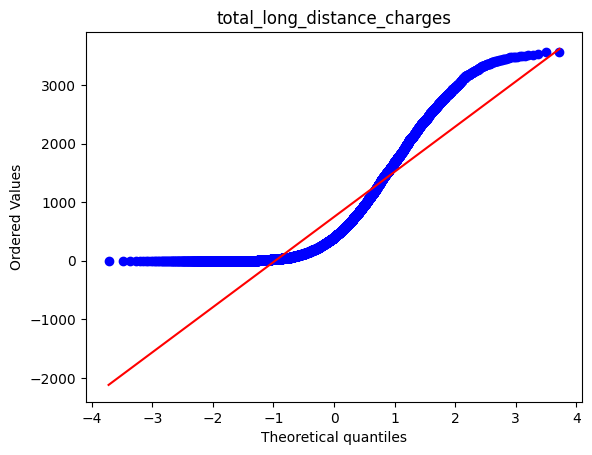



Feature: total_revenue
Unique values: [ 974.81  610.28  415.45 ...  129.99 4769.69 3707.6 ]
Skewness:0.9192144427557702


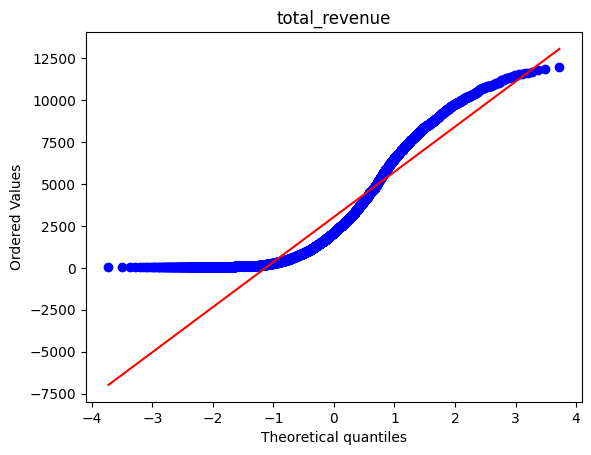



Feature: tenure
Unique values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
Skewness:0.23948872998462153


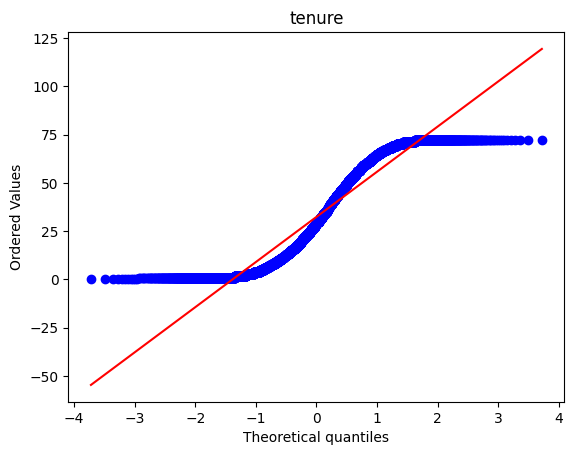



Feature: avg_monthly_gb_download
Unique values: [16 10 30  4 11 73 14  7 21 59 19 12 20 22 17  9  0 52 57 51 41 23 27  2
 69 53 15 29 85 28 18 48 25 26  8  6  5 13 75 82 24 76 47 71 58 42  3 56
 46 39]
Skewness:1.2163247829087303


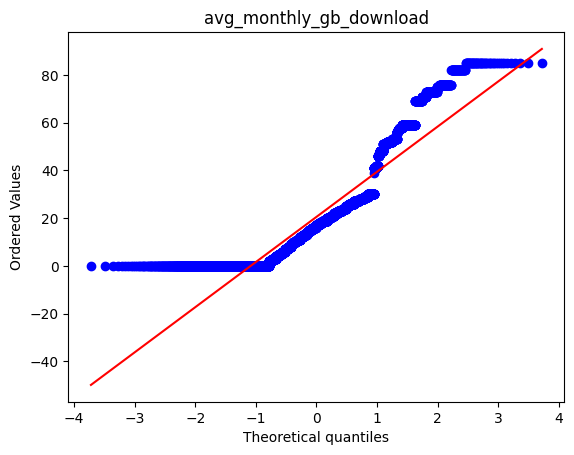



Feature: number_of_referrals
Unique values: [ 2  0  1  3  8  9 10  5  4  7  6 11]
Skewness:1.4457516284649585


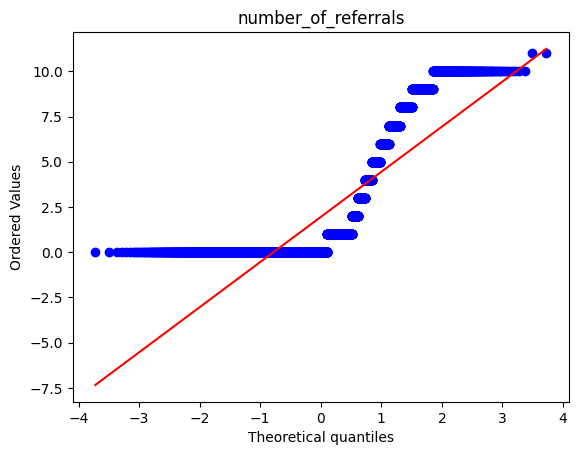



Feature: churn_value
Unique values: [0 1]
Skewness:1.062805029480675


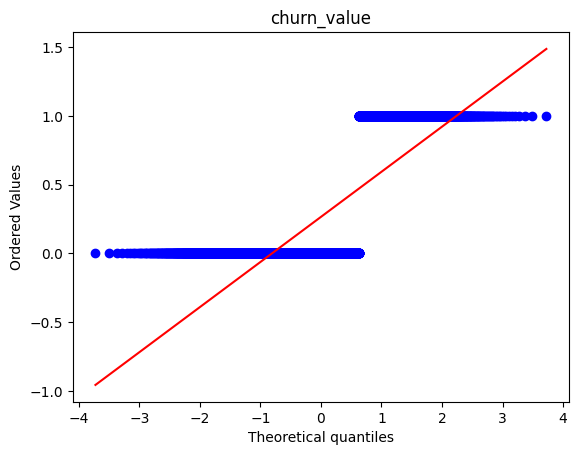

In [49]:
for i in numeric:
    print("Feature:", i)
    print(f"Unique values: {df[i].unique()}")
    print(f'Skewness:{skew(df[i])}')
    probplot(df[i],dist='norm',plot=pylab)
    plt.title(f'{i}')
    plt.show()
    print("\n")

    

# DISTRIBUTION ANALYSIS

zip_code


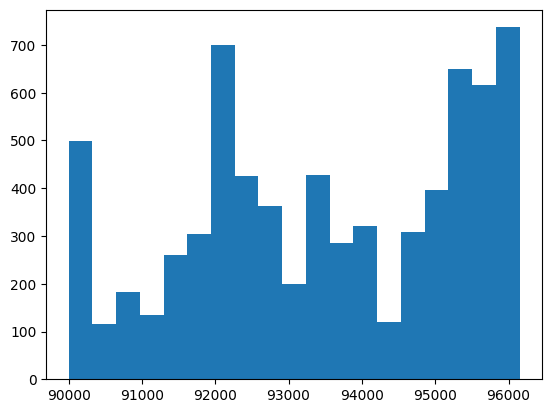

total_population


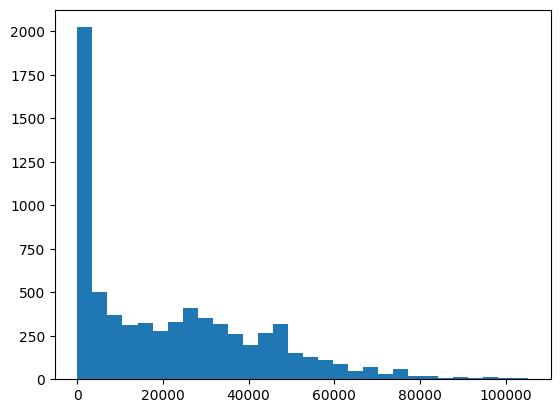

monthly_ charges


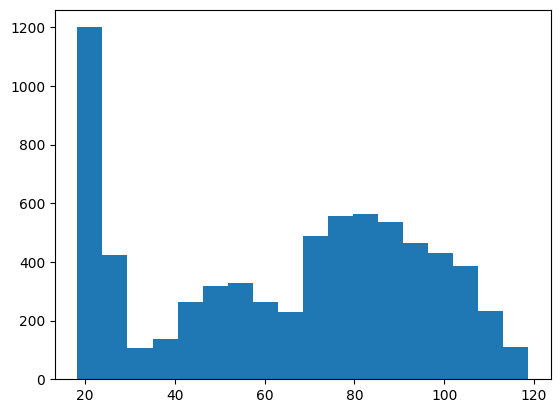

avg_monthly_long_distance_charges


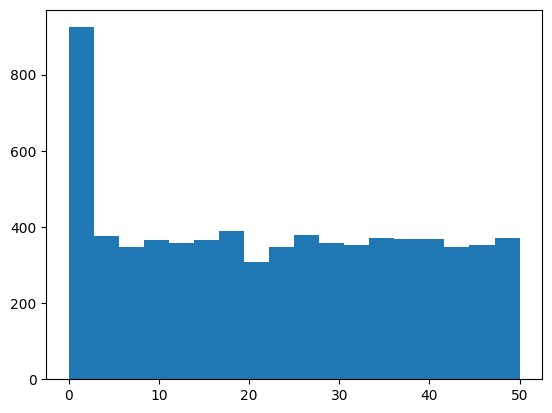

total_charges


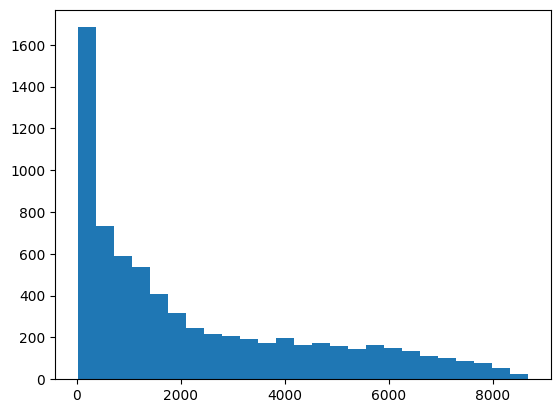

total_refunds


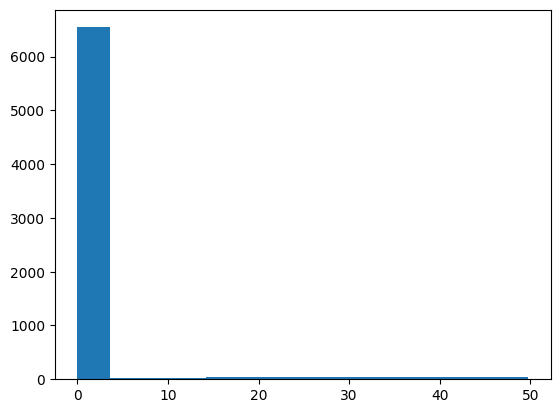

total_long_distance_charges


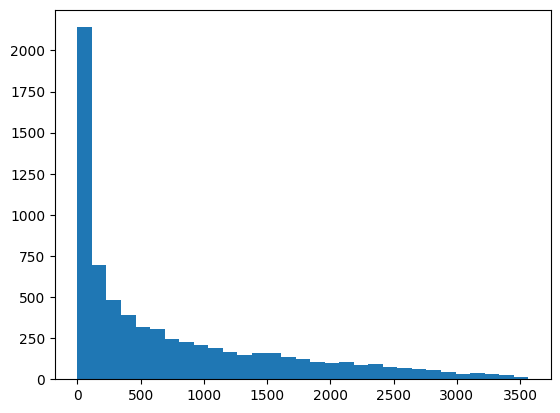

total_revenue


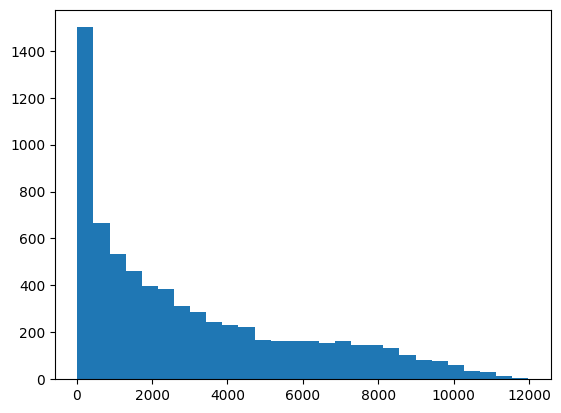

tenure


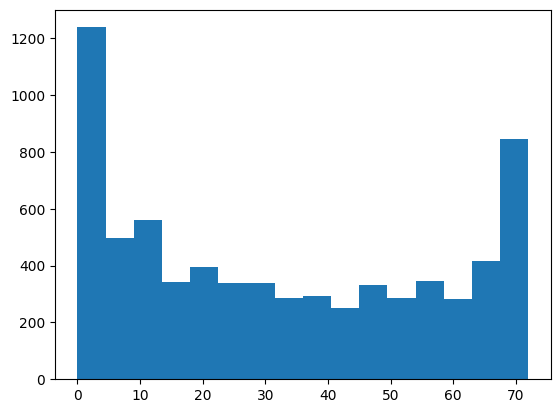

avg_monthly_gb_download


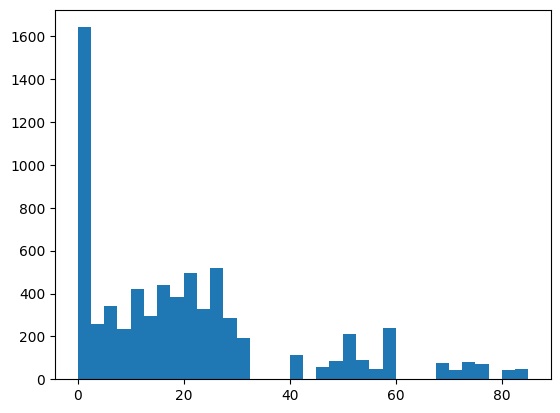

In [50]:
from collections import Counter
continous=['zip_code','total_population', 'monthly_ charges','avg_monthly_long_distance_charges','total_charges','total_refunds', 'total_long_distance_charges','total_revenue','tenure','avg_monthly_gb_download']
for i in continous:
    print(i)
    cnts=Counter(df[i].sort_values())
    keys=cnts.keys()
    vals=cnts.values()
    plt.hist(df[i], bins='auto')
    plt.show()

# OUTLIER ANALYSIS

zip_code


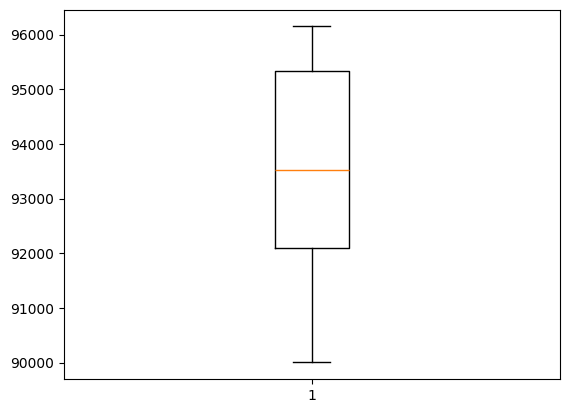

total_population


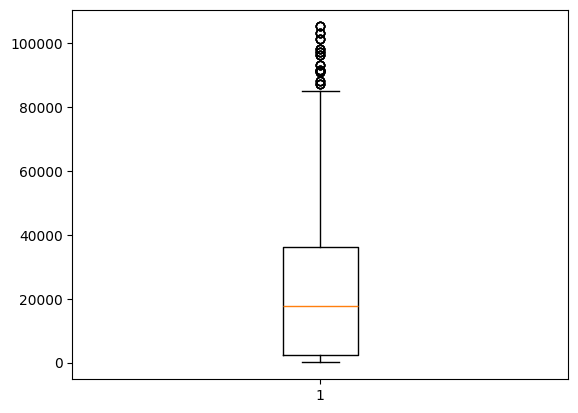

monthly_ charges


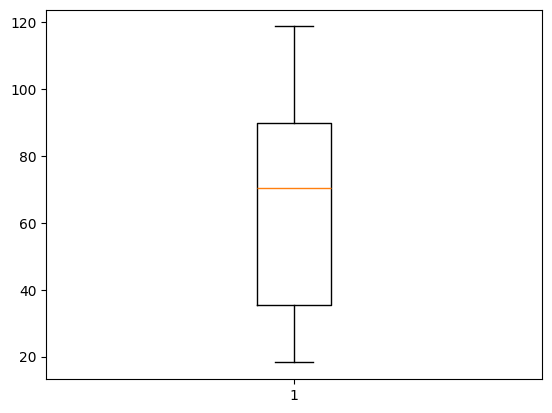

avg_monthly_long_distance_charges


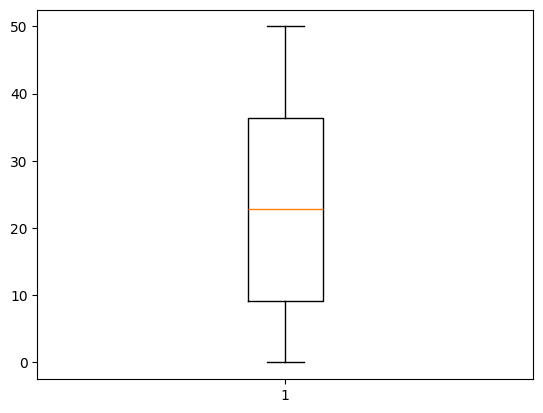

total_charges


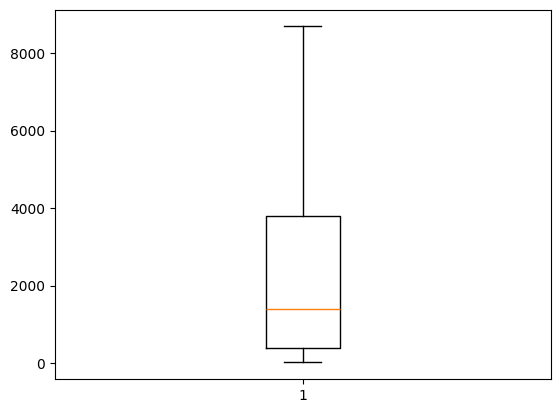

total_refunds


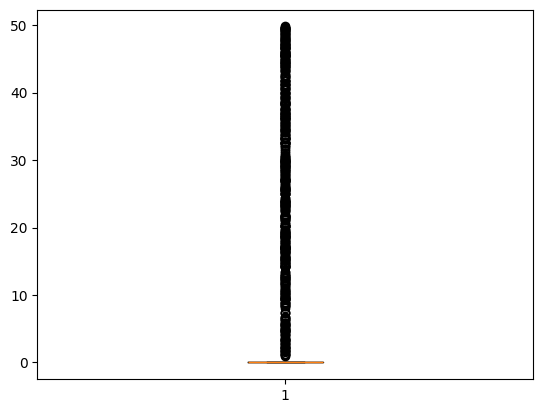

total_long_distance_charges


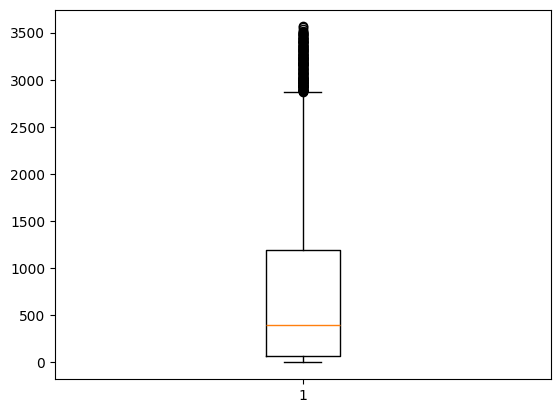

total_revenue


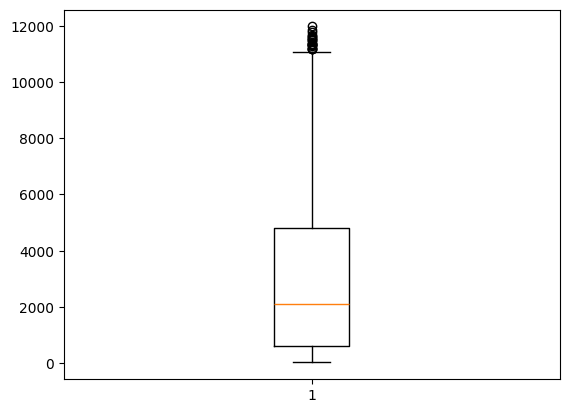

tenure


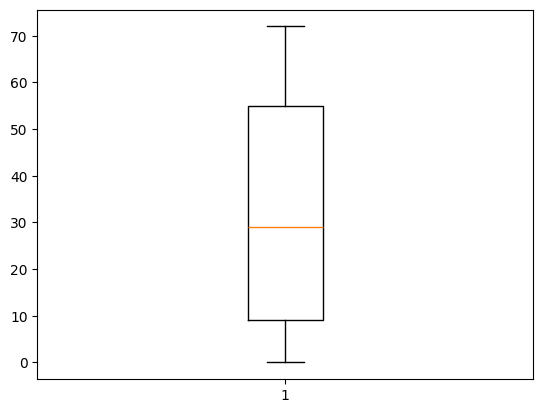

avg_monthly_gb_download


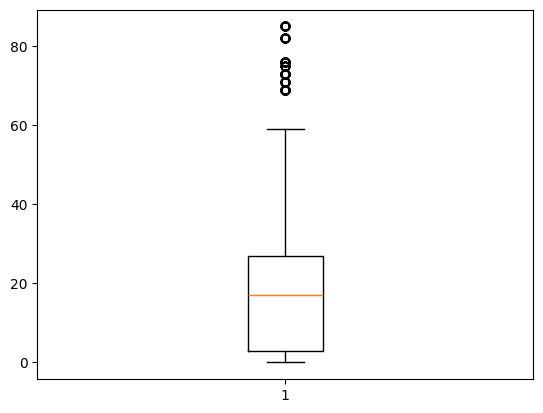

In [51]:
for i in continous:
    print(i)
    plt.boxplot(df[i])
    plt.show()

# SPEARMAN RANK CORRELATION

In [52]:
only_numeric_df=df.drop(columns=categorical)
numeric_corr=only_numeric_df.corr(method='spearman')
numeric_corr['churn_value'].sort_values(ascending=False)

churn_value                          1.000000
monthly_ charges                     0.184743
avg_monthly_gb_download              0.110684
age                                  0.109779
total_population                     0.055423
total_extra_data_charges             0.044648
avg_monthly_long_distance_charges    0.008458
zip_code                            -0.020407
total_refunds                       -0.039466
total_charges                       -0.231236
number_of_referrals                 -0.232731
total_long_distance_charges         -0.240615
number_of_dependents                -0.246088
total_revenue                       -0.263706
tenure                              -0.367062
Name: churn_value, dtype: float64

# CHI SQUARE TEST

Null hypothesis: feature1 and target feature are independent 

So reject H0 when p value is less than 0.05 

Else accept H0

In [55]:
from scipy.stats import chi2_contingency, f_oneway

def chi_square_test(df, categorical_target, categorical_feature):
    contingency_table = pd.crosstab(df[categorical_target], df[categorical_feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

dependent_cat_features=[]
print("P values:")
for i in categorical:
    p_value=chi_square_test(df,'customer_status',i)
    if p_value<0.05:
        dependent_cat_features.append(i)
    print(i,chi_square_test(df,'customer_status',i))

print("\nTarget feature is dependent on these features:",dependent_cat_features)

P values:
gender 0.35490117109455394
under_30 2.6017367331106337e-05
senior_citizen 1.1445987367817024e-38
married 2.5743649669241753e-86
city 1.575789257063463e-05
phone_service 0.3121079709316997
internet_service 1.5019165169876657e-90
online_security 5.5642666549581354e-74
online_backup 7.812436230432495e-41
device_protection 2.4337813317878154e-48
premium_tech_support 2.4235702677867366e-70
streaming_tv 3.1669062517904404e-37
streaming_movies 9.89543368939128e-38
streaming_music 5.524690220439724e-28
internet_type 9.300117860012577e-58
contract 0.0
paperless_billing 1.261394906561754e-61
payment_method 1.235112767274709e-199
internet_service.1 1.5019165169876657e-90
phone_service.1 0.3121079709316997
multiple_lines 5.4264934564120684e-46
unlimited_data 6.787055959638584e-52
offer 6.982366892336427e-236
referred_a_friend 2.3101079119788114e-80
customer_status 0.0
churn_reason 0.0

Target feature is dependent on these features: ['under_30', 'senior_citizen', 'married', 'city', 'inter